<a href="https://colab.research.google.com/github/tgrappoport/pythoncamp/blob/main/Aula1_Modelo_TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estrutura de bandas e modelo tight-binding

Neste notebook introduziremos conceitos fundamentais necessários para o estudo de estados eletrônicos em sólidos (estruturas cristalinas periódicas) e para a compreensão de estados topológicos em matéria condensada.

O objetivo principal é mostrar como a periodicidade cristalina permite reduzir o problema quântico a um problema matricialdependente de
$\mathbf{k}$ e resolver numericamente.

**Objetivos:**
- Entender como a periodicidade leva ao problema em $\mathbf{k}$
- Construir e diagonalizar Hamiltonianos $H(\mathbf{k})$ (tight-binding)
- Interpretar autovalores e autovetores em sistemas periódicos
- Calcular e visualizar estruturas de bandas $E_n(\mathbf{k})$
- Aplicar o método ao grafeno (rede honeycomb)

## 0. Ferramentas numéricas

Em tight-binding, a estrutura de bandas é obtida resolvendo, para cada $\mathbf{k}$,

$$
H(\mathbf{k})\, |u_n(\mathbf{k})\rangle = E_n(\mathbf{k})\, |u_n(\mathbf{k})\rangle,
$$

onde:
- $H(\mathbf{k})$ é uma matriz (dimensão = número de orbitais por célula unitária),
- $E_n(\mathbf{k})$ são as energias (bandas),
- $|u_n(\mathbf{k})\rangle$ são os autovetores (funções de onda na base escolhida).

Vamos usar NumPy para construir matrizes e rotinas de álgebra linear para diagonalizá-las.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

np.set_printoptions(precision=4, suppress=True)

### Autovalores: `eigh` vs `eig`

- `LA.eigh(H)` é a escolha **preferencial** quando $H = H^\dagger$ (Hermitiana).
  Nesse caso, os autovalores são reais.

- `LA.eig(H)` funciona para matrizes gerais (inclusive não Hermitianas),
  e pode retornar autovalores complexos.

In [5]:
# Exemplo Hermitiano (autovalores reais)
H = np.array([[0, 1],
              [1, 0]], dtype=complex)

E, U = LA.eigh(H)
print("E =", E)

# Exemplo não-Hermitiano (pode ter espectro complexo)
Hnh = np.array([[0, 1],
                [2, 0]], dtype=complex)

E_nh, V_nh = LA.eig(Hnh)
print("E_nh =", E_nh)

E = [-1.  1.]
E_nh = [ 1.4142+0.j -1.4142+0.j]


## 1. Redes cristalinas e periodicidade

Um cristal ideal é descrito por uma rede de Bravais gerada por vetores primitivos
$\mathbf{a}_1, \mathbf{a}_2, \mathbf{a}_3$. Qualquer vetor da rede pode ser escrito como

$$
\mathbf{R} = n_1 \mathbf{a}_1 + n_2 \mathbf{a}_2 + n_3 \mathbf{a}_3,
\qquad n_i \in \mathbb{Z}.
$$

A periodicidade cristalina implica que o potencial (e o Hamiltoniano) são invariantes
por translações da rede:

$$
V(\mathbf{r}+\mathbf{R}) = V(\mathbf{r}),
\qquad
H(\mathbf{r}+\mathbf{R}) = H(\mathbf{r}).
$$

Essa simetria de translação é o ponto de partida para trabalhar no espaço recíproco.

## 2. Teorema de Bloch

Para um Hamiltoniano periódico, os autestados podem ser escolhidos como autestados
do operador de translação. O teorema de Bloch afirma que as soluções podem ser escritas como

$$
\psi_{n\mathbf{k}}(\mathbf{r}) = e^{i\mathbf{k}\cdot\mathbf{r}}\, u_{n\mathbf{k}}(\mathbf{r}),
$$

onde $u_{n\mathbf{k}}(\mathbf{r})$ tem a mesma periodicidade do cristal:

$$
u_{n\mathbf{k}}(\mathbf{r}+\mathbf{R}) = u_{n\mathbf{k}}(\mathbf{r}).
$$

**Mensagem operacional:**
a periodicidade permite parametrizar o problema por $\mathbf{k}$ e obter a estrutura de bandas
como o conjunto de autovalores

$$
E_n(\mathbf{k}), \quad \mathbf{k} \in \text{1ª zona de Brillouin}.
$$

No tight-binding (que veremos a seguir), isso se traduz diretamente em construir uma matriz
$H(\mathbf{k})$ e diagonalizá-la numericamente para cada $\mathbf{k}$.

## 3. A aproximação tight-binding (TB): de orbitais localizados a $H(\mathbf{k})$

A ideia central do tight-binding é descrever os elétrons em um cristal usando uma base de
estados **localizados** (aproximadamente atômicos), e assumir que a dinâmica é dominada por:

1. **Energias locais** (“on-site”) associadas a cada orbital;
2. **Acoplamentos entre orbitais em sítios diferentes** (os *hoppings*), que codificam a
   probabilidade/amplitude de um elétron “pular” de um sítio para outro.

Essa é uma aproximação natural quando a função de onda tem peso significativo perto dos átomos
e os estados eletrônicos do sólido podem ser construídos como combinações lineares de orbitais
atômicos (LCAO).



### 3.1 Base localizada: orbitais e células unitárias

Considere uma rede de Bravais com vetores de translação $\mathbf{R}$ e uma base com $N_{\rm orb}$
orbitais por célula unitária. Vamos denotar um estado localizado por:

$$
|\alpha,\mathbf{R}\rangle,
$$

onde:
- $\mathbf{R}$ identifica a célula unitária,
- $\alpha = 1,\dots,N_{\rm orb}$ é o índice do orbital dentro da célula (pode representar sub-rede,
  orbital $s,p,d$, spin, etc.).

Em muitos modelos TB assume-se (para simplificar) que esses estados são ortonormais:

$$
\langle \alpha,\mathbf{R}|\beta,\mathbf{R}'\rangle \approx \delta_{\alpha\beta}\,\delta_{\mathbf{R},\mathbf{R}'}.
$$

> Comentário: rigorosamente, orbitais atômicos reais não são ortogonais entre si em sítios diferentes,
> e o problema completo envolve uma matriz de sobreposição $S$. Em muitos contextos (especialmente em
> modelos mínimos) assume-se base ortonormal e trabalha-se apenas com $H$.

---

### 3.2 De onde vem o *hopping*? (origem física e significado)

O Hamiltoniano microscópico do elétron no potencial do cristal pode ser pensado como:

$$
H = \frac{\mathbf{p}^2}{2m} + V(\mathbf{r}),
\qquad V(\mathbf{r}+\mathbf{R})=V(\mathbf{r}).
$$

O que entra no tight-binding são **elementos de matriz** desse Hamiltoniano na base localizada:

$$
H_{\alpha\beta}(\mathbf{R},\mathbf{R}')
\equiv
\langle \alpha,\mathbf{R}|H|\beta,\mathbf{R}'\rangle.
$$

Por **invariância translacional**, esses elementos dependem apenas da diferença de posições:

$$
\langle \alpha,\mathbf{R}|H|\beta,\mathbf{R}'\rangle
=
\langle \alpha,0|H|\beta,\mathbf{R}'-\mathbf{R}\rangle.
$$

Por isso, define-se:

- **On-site (energia local)**:
$$
\varepsilon_\alpha \equiv \langle \alpha,0|H|\alpha,0\rangle.
$$

- **Hopping** (acoplamento entre orbitais distintos e/ou células diferentes):
$$
t_{\alpha\beta}(\mathbf{R}) \equiv \langle \alpha,0|H|\beta,\mathbf{R}\rangle.
$$

Intuitivamente:
- $t_{\alpha\beta}(\mathbf{R})$ mede “o quanto” o estado $|\beta,\mathbf{R}\rangle$ se mistura com
  $|\alpha,0\rangle$ quando o Hamiltoniano atua.
- Em termos físicos, ele surge do **overlap espacial** das funções de onda localizadas
  via os termos cinético + potencial.
- Em geral, $|t_{\alpha\beta}(\mathbf{R})|$ decai com a distância $|\mathbf{R}|$ porque orbitais
  localizados têm caudas pequenas longe do sítio.

> Em modelos mínimos, muitas vezes mantém-se apenas hoppings até vizinhos mais próximos (NN) ou
> próximos (NNN), porque esses são os maiores e já capturam muita física.

- O Hamiltoniano tight-binding pode ser escrito como:
$$
H = \sum_{\mathbf{R},\alpha} \varepsilon_\alpha|\alpha,\mathbf{R}\rangle \langle \alpha,\mathbf{R}|+\sum_{\mathbf{R},\mathbf{R}',\alpha,\beta}
t_{\alpha\beta}(\mathbf{R}'-\mathbf{R})
|\alpha,\mathbf{R}\rangle \langle \beta,\mathbf{R}'|.
$$
---

### 3.3 Hermiticidade e simetrias: restrições sobre os hoppings

Para sistemas fechados usuais, o Hamiltoniano é Hermitiano: $H = H^\dagger$.
Isso impõe:

$$
\langle \alpha,0|H|\beta,\mathbf{R}\rangle
=
\langle \beta,\mathbf{R}|H|\alpha,0\rangle^*.
$$

Em termos dos hoppings:

$$
t_{\alpha\beta}(\mathbf{R}) = t_{\beta\alpha}^*(-\mathbf{R}).
$$

Casos comuns:
- Se não há campos magnéticos/fluxos complexos, pode-se escolher muitos hoppings como reais.
- Se há fases (por exemplo via substituição de Peierls), hoppings podem ser complexos e codificam
  fluxos magnéticos efetivos.

---

### 3.4 Como construir estados de Bloch na base tight-binding

A periodicidade sugere trabalhar em $\mathbf{k}$. Define-se o estado de Bloch associado ao orbital $\alpha$:

$$
|\alpha,\mathbf{k}\rangle
=
\frac{1}{\sqrt{N}}
\sum_{\mathbf{R}} e^{i\mathbf{k}\cdot\mathbf{R}}\, |\alpha,\mathbf{R}\rangle,
$$

onde $N$ é o número de células (tomado grande; condições periódicas).

Esses estados diagonalizam as translações e são a forma TB de implementar o teorema de Bloch.

---

### 3.5 Derivação operacional de $H(\mathbf{k})$

Queremos os elementos de matriz do Hamiltoniano na base $|\alpha,\mathbf{k}\rangle$:

$$
H_{\alpha\beta}(\mathbf{k})
\equiv
\langle \alpha,\mathbf{k}|H|\beta,\mathbf{k}\rangle.
$$

Usando a definição acima:

$$
\langle \alpha,\mathbf{k}|H|\beta,\mathbf{k}\rangle
=
\frac{1}{N}
\sum_{\mathbf{R},\mathbf{R}'}
e^{-i\mathbf{k}\cdot\mathbf{R}}
e^{i\mathbf{k}\cdot\mathbf{R}'}
\langle \alpha,\mathbf{R}|H|\beta,\mathbf{R}'\rangle.
$$

Agora usamos a invariância translacional:

$$
\langle \alpha,\mathbf{R}|H|\beta,\mathbf{R}'\rangle
=
\langle \alpha,0|H|\beta,\mathbf{R}'-\mathbf{R}\rangle
\equiv t_{\alpha\beta}(\mathbf{R}'-\mathbf{R}).
$$

Definindo $\boldsymbol{\Delta}=\mathbf{R}'-\mathbf{R}$, a soma em $\mathbf{R}$ apenas conta $N$ vezes e cancela o fator $1/N$, obtendo:

$$
H_{\alpha\beta}(\mathbf{k})
=
\sum_{\boldsymbol{\Delta}} t_{\alpha\beta}(\boldsymbol{\Delta})\, e^{i\mathbf{k}\cdot\boldsymbol{\Delta}}.
$$

Essa é a fórmula central do tight-binding:

$$
\boxed{
H(\mathbf{k}) = \sum_{\mathbf{R}} t(\mathbf{R})\, e^{i\mathbf{k}\cdot\mathbf{R}}.
}
$$

onde $t(\mathbf{R})$ é a matriz $N_{\rm orb}\times N_{\rm orb}$ cujos elementos são $t_{\alpha\beta}(\mathbf{R})$.

Explicitando os termos onsite, obtemos:

$$
H_{\alpha\beta}(\mathbf{k})
=
\varepsilon_\alpha \delta_{\alpha\beta}
+
\sum_{\mathbf{R}\neq 0}
t_{\alpha\beta}(\mathbf{R})
e^{i\mathbf{k}\cdot\mathbf{R}}.
$$

Portanto:

- Os termos onsite aparecem como elementos diagonais independentes de $\mathbf{k}$.
- Os hoppings geram a dependência em $\mathbf{k}$ e determinam a dispersão das bandas.

### Interpretação física

- Os termos onsite controlam a posição média das bandas.
- Os hoppings determinam sua largura e forma.
- Diferenças de energia onsite entre sub-redes podem abrir gaps.
- A estrutura de fases dos hoppings pode induzir propriedades topológicas.
---

### 3.6 Estrutura de bandas e funções de onda

A estrutura de bandas é obtida diagonalizando $H(\mathbf{k})$ para cada $\mathbf{k}$:

$$
H(\mathbf{k})\, \mathbf{u}_n(\mathbf{k}) = E_n(\mathbf{k})\, \mathbf{u}_n(\mathbf{k}),
$$

onde $\mathbf{u}_n(\mathbf{k})$ é um vetor com $N_{\rm orb}$ componentes (amplitudes nos orbitais $\alpha$).
Isso nos dá:

- **Bandas**: $E_n(\mathbf{k})$
- **Conteúdo orbital/sub-rede**: $|u_{n,\alpha}(\mathbf{k})|^2$
- **Fases relativas**: importantes para textura de pseudo-spin, curvatura de Berry e invariantes topológicos
  (veremos nos próximos notebooks).

---

### 3.7 Interpretação geométrica: $H(\mathbf{k})$ como “transformada de Fourier” dos hoppings

A equação
$$
H_{\alpha\beta}(\mathbf{k}) = \sum_{\mathbf{R}} t_{\alpha\beta}(\mathbf{R}) e^{i\mathbf{k}\cdot\mathbf{R}}
$$
mostra que:

- Escolher hoppings no espaço real $\Rightarrow$ determina completamente $H(\mathbf{k})$.
- Manter apenas NN/NNN $\Rightarrow$ produz expressões simples (cossenos e senos).
- A periodicidade em $\mathbf{k}$ vem diretamente das fases $e^{i\mathbf{k}\cdot\mathbf{R}}$.

Essa “ponte” espaço real $\leftrightarrow$ espaço recíproco é o núcleo do tight-binding.

---

### 3.8 Observação (opcional): matriz de sobreposição $S(\mathbf{k})$

Se a base localizada não for ortonormal, define-se:

$$
S_{\alpha\beta}(\mathbf{R}) = \langle \alpha,0|\beta,\mathbf{R}\rangle,
\qquad
S_{\alpha\beta}(\mathbf{k})=\sum_{\mathbf{R}} S_{\alpha\beta}(\mathbf{R})e^{i\mathbf{k}\cdot\mathbf{R}}.
$$

O problema vira um problema de autovalores generalizado:

$$
H(\mathbf{k})\, \mathbf{u}_n(\mathbf{k}) = E_n(\mathbf{k})\, S(\mathbf{k})\, \mathbf{u}_n(\mathbf{k}).
$$

Neste curso, para modelos mínimos, assumiremos $S(\mathbf{k})=\mathbb{1}$.

---

### 3.9 O que vem a seguir (hands-on)

A partir daqui, a receita computacional será:

1. Listar os hoppings $t_{\alpha\beta}(\mathbf{R})$ do modelo (NN, NNN, etc.)
2. Construir a matriz $H(\mathbf{k})$
3. Diagonalizar para cada $\mathbf{k}$
4. Plotar $E_n(\mathbf{k})$ ao longo de um caminho de alta simetria

Na próxima seção implementaremos isso explicitamente para uma cadeia 1D e depois para um modelo com dois sítios por célula.

## 4. Exemplo 1: cadeia 1D monoorbital (onsite + hopping NN)

Vamos começar com o modelo tight-binding mais simples possível que já gera uma banda:
uma cadeia 1D com **um orbital por célula** e **hopping apenas entre primeiros vizinhos**.

### 4.1 Hamiltoniano em espaço real

Denotemos por $|R\rangle$ o orbital localizado na célula $R$ (aqui $R = n a$, com $n\in\mathbb{Z}$).
O Hamiltoniano com energia onsite $\varepsilon$ e hopping NN $t$ é

$$
H
=
\sum_R \varepsilon\, |R\rangle\langle R|
+
\sum_R \left(
t\, |R\rangle\langle R+a|
+
t^*\, |R+a\rangle\langle R|
\right).
$$

Em muitos modelos (sem campos/fluxos), podemos tomar $t$ real: $t^*=t$.

---

### 4.2 Hamiltoniano em $\mathbf{k}$ e dispersão analítica

Definimos o estado de Bloch 1D (com passo $a$) como

$$
|k\rangle = \frac{1}{\sqrt{N}} \sum_R e^{ikR}\,|R\rangle,
\qquad k \in \left[-\frac{\pi}{a},\frac{\pi}{a}\right].
$$



Partimos do Hamiltoniano em espaço real (com $t$ real, para simplificar):

$$
H
=
\sum_R \varepsilon\, |R\rangle\langle R|
+
\sum_R \left(
t\, |R\rangle\langle R+a|
+
t\, |R+a\rangle\langle R|
\right).
$$

Definimos o estado de Bloch:

$$
|k\rangle = \frac{1}{\sqrt{N}}\sum_R e^{ikR}\,|R\rangle,
\qquad
\langle k| = \frac{1}{\sqrt{N}}\sum_{R} e^{-ikR}\,\langle R|.
$$

Vamos calcular o elemento de matriz $\langle k|H|k\rangle$.

---

#### (i) Termo onsite

$$
\begin{aligned}
\langle k|\sum_R \varepsilon\, |R\rangle\langle R|\,|k\rangle
&=
\varepsilon \sum_R \langle k|R\rangle\langle R|k\rangle \\
&=
\varepsilon \sum_R \left(\frac{1}{\sqrt{N}}e^{-ikR}\right)\left(\frac{1}{\sqrt{N}}e^{ikR}\right) \\
&=
\varepsilon \sum_R \frac{1}{N}
=
\varepsilon.
\end{aligned}
$$

---

#### (ii) Hopping para a direita: $t\,|R\rangle\langle R+a|$

$$
\begin{aligned}
\langle k|\sum_R t\,|R\rangle\langle R+a|\,|k\rangle
&=
t \sum_R \langle k|R\rangle\langle R+a|k\rangle \\
&=
t \sum_R \left(\frac{1}{\sqrt{N}}e^{-ikR}\right)\left(\frac{1}{\sqrt{N}}e^{ik(R+a)}\right) \\
&=
t \sum_R \frac{1}{N} e^{ika}
=
t\,e^{ika}.
\end{aligned}
$$

---

#### (iii) Hopping para a esquerda: $t\,|R+a\rangle\langle R|$

De forma análoga:

$$
\begin{aligned}
\langle k|\sum_R t\,|R+a\rangle\langle R|\,|k\rangle
&=
t \sum_R \langle k|R+a\rangle\langle R|k\rangle \\
&=
t \sum_R \left(\frac{1}{\sqrt{N}}e^{-ik(R+a)}\right)\left(\frac{1}{\sqrt{N}}e^{ikR}\right) \\
&=
t \sum_R \frac{1}{N} e^{-ika}
=
t\,e^{-ika}.
\end{aligned}
$$

---

#### Resultado final

Somando as contribuições:

$$
\begin{aligned}
H(k) \equiv \langle k|H|k\rangle
&= \varepsilon + t e^{ika} + t e^{-ika} \\
&= \varepsilon + 2t\cos(ka).
\end{aligned}
$$

Portanto, a dispersão do modelo 1D NN é

$$
\boxed{E(k) = \varepsilon + 2t\cos(ka).}
$$

> Comentário: se $t$ for complexo, o resultado geral é
> $H(k)=\varepsilon + t e^{ika}+t^* e^{-ika}$, que continua sendo real se $H$ for Hermitiano.
**Interpretação:**
- $\varepsilon$ desloca rigidamente a banda (energia média).
- $t$ controla a **largura de banda** (dispersão). Para $t<0$, o mínimo de energia ocorre em $k=0$.

---


### 4.3 Implementação numérica: receita geral para $H(k)$

Agora vamos implementar a mesma ideia de forma operacional:

1. Definir uma malha de $k$ na 1ª zona de Brillouin;
2. Construir $H(k)$ a partir de termos onsite e hoppings;
3. Diagonalizar (ou, neste caso 1×1, simplesmente ler o valor);
4. Plotar $E(k)$.

A mesma receita será usada em modelos com mais de um orbital por célula, onde $H(k)$ será uma matriz $N_{\rm orb}\times N_{\rm orb}$.

Erro máximo (numérico vs analítico): 4.440892098500626e-16


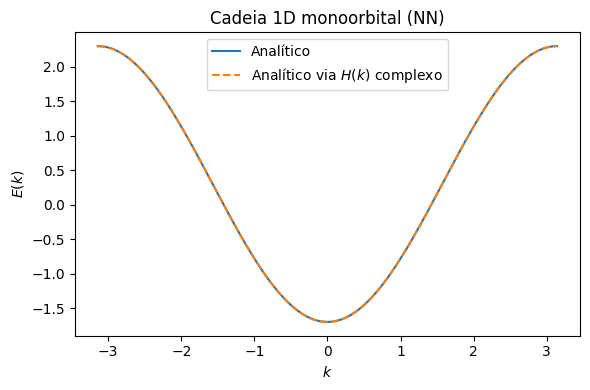

In [4]:
# Parâmetros
a = 1.0
eps = 0.3
t = -1.0

# Malha de k
Nk = 400
k = np.linspace(-np.pi/a, np.pi/a, Nk)

def Hk_chain_1orb(k, eps, t, a=1.0):
    """
    Hamiltoniano 1D monoorbital com onsite eps e hopping NN t.
    Retorna H(k) (aqui é 1x1, mas devolvemos como número complexo).
    """
    return eps + t*np.exp(1j*k*a) + np.conj(t)*np.exp(-1j*k*a)

# Calcula H(k) na malha
Hk_vals = Hk_chain_1orb(k, eps, t, a=a)

# "Bandas": para 1 orbital é só o próprio valor (deve ser real para t real)
E_num = np.real(Hk_vals)

# Expressão analítica para comparação
E_ana = eps + 2*t*np.cos(k*a)

# Checagem quantitativa
max_err = np.max(np.abs(E_num - E_ana))
print("Erro máximo (numérico vs analítico):", max_err)

# Plot
plt.figure(figsize=(6,4))
plt.plot(k, E_ana, label="Analítico")
plt.plot(k, E_num, "--", label="Analítico via $H(k)$ complexo")
plt.xlabel(r"$k$")
plt.ylabel(r"$E(k)$")
plt.title("Cadeia 1D monoorbital (NN)")
plt.legend()
plt.tight_layout()
plt.show()

### 4.4 Pequena generalização

No caso geral, com mais orbitais por célula, $H(k)$ será uma matriz.
A diagonalização será feita com:

- `LA.eigh(Hk)` para $H(k)=H(k)^\dagger$ (Hermitiano)
- `LA.eig(Hk)` no caso geral (ex.: não Hermitiano)

No próximo exemplo (duas sub-redes A/B), isso vai gerar duas bandas.

## 5. Exemplo 2: cadeia 1D com dois sítios por célula (A/B) — primeira matriz $2\times 2$

Agora consideramos uma cadeia 1D cuja célula unitária contém **dois orbitais** (ou duas sub-redes),
que chamaremos de $A$ e $B$. Esse é o exemplo mínimo em que $H(k)$ vira uma matriz e aparecem
**duas bandas**.

Este modelo também será a ponte natural para o SSH (Notebook 2).

### 5.1 Geometria e convenções

Vamos definir:

- Células indexadas por $R = n a$
- Em cada célula existem dois orbitais: $|A,R\rangle$ e $|B,R\rangle$
- Energias onsite (podem ser diferentes):
  $$
  \varepsilon_A,\qquad \varepsilon_B.
  $$

Para os hoppings, vamos considerar:

1. **Hopping intracélula** entre $A$ e $B$ na mesma célula: amplitude $t_1$
   $$
   |A,R\rangle \leftrightarrow |B,R\rangle
   $$

2. **Hopping intercélula** entre $B$ da célula $R$ e $A$ da célula vizinha $R+a$: amplitude $t_2$
   $$
   |B,R\rangle \leftrightarrow |A,R+a\rangle
   $$

Esse padrão é exatamente o "dímero 1D" (que vira o SSH quando discutimos topologia).
### 5.2 Hamiltoniano em espaço real

O Hamiltoniano tight-binding correspondente é:

$$
\begin{aligned}
H = \sum_R \Big(
&\varepsilon_A |A,R\rangle\langle A,R| + \varepsilon_B |B,R\rangle\langle B,R| \\
&+ t_1 |A,R\rangle\langle B,R| + t_1^* |B,R\rangle\langle A,R| \\
&+ t_2 |A,R+a\rangle\langle B,R| + t_2^* |B,R\rangle\langle A,R+a|
\Big).
\end{aligned}
$$

Assumiremos $t_1,t_2$ reais na maior parte do tempo.
### 5.3 Construção de $H(k)$

Na base de Bloch $\{|A,k\rangle,|B,k\rangle\}$, os termos onsite contribuem para a diagonal:

$$
H_{AA}(k)=\varepsilon_A, \qquad H_{BB}(k)=\varepsilon_B.
$$

Os hoppings geram elementos fora da diagonal. A partir da receita
$H_{\alpha\beta}(k)=\sum_R t_{\alpha\beta}(R)e^{ikR}$, obtemos:

- Intracélula: contribui com $t_1$
- Intercélula: contribui com $t_2 e^{-ika}$ (ou $t_2 e^{ika}$ dependendo da convenção; aqui a escolha é consistente com o termo $|A,R+a\rangle\langle B,R|$ acima)

Assim, podemos escrever:

$$
H(k)=
\begin{pmatrix}
\varepsilon_A & f(k)\\
f^*(k) & \varepsilon_B
\end{pmatrix},
\qquad
f(k) = t_1 + t_2 e^{-ika}.
$$

Para $t_1,t_2$ reais, $f^*(k)=t_1 + t_2 e^{ika}$ e $H(k)$ é Hermitiano.

### 5.4 Bandas: interpretação qualitativa

Diagonalizar $H(k)$ fornece duas bandas $E_\pm(k)$.

Alguns pontos importantes:
- Se $\varepsilon_A=\varepsilon_B$ e $t_1,t_2\neq 0$, temos duas bandas separadas por um gap que pode fechar em pontos especiais (isso será crucial no SSH).
- Se $\varepsilon_A\neq\varepsilon_B$, a diferença onsite tende a abrir (ou aumentar) um gap: é um "termo de massa" simples.

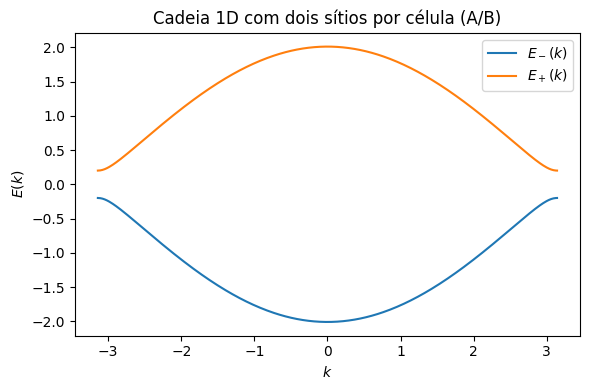

In [27]:
# Parâmetros
a = 1.0
epsA = -0.2
epsB = 0.2
t1 = 1.0
t2 = 1.0

# Malha de k
Nk = 400
k = np.linspace(-np.pi/a, np.pi/a, Nk)

def Hk_AB_chain(k, epsA, epsB, t1, t2, a=1.0):
    """
    Hamiltoniano 2x2 para a cadeia 1D com dois sítios por célula (A/B).
    Convenção: f(k) = t1 + t2 e^{-ika}.
    """
    f = t1 + t2*np.exp(-1j*k*a)
    Hk = np.array([[epsA, f],
                   [np.conj(f), epsB]], dtype=complex)
    return Hk

# Diagonalização ao longo de k
E = np.zeros((2, Nk))
U = np.zeros((2, 2, Nk), dtype=complex)  # autovetores (opcional guardar)

for i, ki in enumerate(k):
    Hk = Hk_AB_chain(ki, epsA, epsB, t1, t2, a=a)
    eigvals, eigvecs = LA.eigh(Hk)   # Hermitiano -> eigh
    E[:, i] = eigvals
    U[:, :, i] = eigvecs

# Plot bandas
plt.figure(figsize=(6,4))
plt.plot(k, E[0], label=r"$E_-(k)$")
plt.plot(k, E[1], label=r"$E_+(k)$")
plt.xlabel(r"$k$")
plt.ylabel(r"$E(k)$")
plt.title("Cadeia 1D com dois sítios por célula (A/B)")
plt.legend()
plt.tight_layout()
plt.show()

### 5.5 Peso em sub-rede

Para cada banda e cada $k$, o autovetor pode ser escrito como

$$
|u_n(k)\rangle =
\begin{pmatrix}
u_{nA}(k)\\
u_{nB}(k)
\end{pmatrix}.
$$

O peso em cada sub-rede é $|u_{nA}(k)|^2$ e $|u_{nB}(k)|^2$.

Isso será importante quando discutirmos texturas de pseudo-spin e quantidades geométricas
(Berry phase, polarização, etc.).

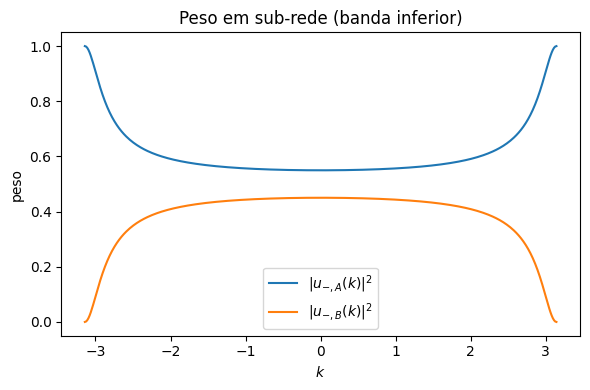

Checagem: max(|A|^2+|B|^2 - 1) = 4.440892098500626e-16


In [28]:
# Peso em sub-rede para a banda inferior (n=0)
# cuidado: colunas são autovetores; aqui pegamos o autovetor da banda 0

# No numpy.linalg.eigh: eigvecs[:, n] é o autovetor do autovalor n
# Então: U[componente, banda, i_k]
weight_A = np.abs(U[0, 0, :])**2
weight_B = np.abs(U[1, 0, :])**2

plt.figure(figsize=(6,4))
plt.plot(k, weight_A, label=r"$|u_{-,A}(k)|^2$")
plt.plot(k, weight_B, label=r"$|u_{-,B}(k)|^2$")
plt.xlabel(r"$k$")
plt.ylabel("peso")
plt.ylim(-0.05, 1.05)
plt.title("Peso em sub-rede (banda inferior)")
plt.legend()
plt.tight_layout()
plt.show()
print("Checagem: max(|A|^2+|B|^2 - 1) =", np.max(np.abs(weight_A + weight_B - 1)))

## 6. Exemplo 3: cadeia 1D multi-orbital ($p_x$ e $p_y$) — hoppings $\sigma$ e $\pi$

Agora vamos considerar **um sítio por célula**, mas com **dois orbitais por sítio**.
A motivação é mostrar que **o caráter orbital controla a dispersão** (largura de banda),
porque a sobreposição entre orbitais depende da orientação espacial.

Assuma que a cadeia é ao longo do eixo $x$ (sítios igualmente espaçados por $a$).
Em cada sítio existem dois orbitais tipo-$p$:

- $p_x$: lóbulo orientado ao longo da cadeia (direção de ligação).
- $p_y$: lóbulo orientado perpendicularmente à cadeia.

### Hopping $\sigma$ vs $\pi$ (intuição)



O hopping entre dois orbitais em sítios vizinhos vem do elemento de matriz
$$
t = \langle \phi_i | H | \phi_j \rangle,
$$
e sua magnitude é controlada pela **sobreposição** das funções de onda (mais precisamente,
pelo overlap via termo cinético + potencial efetivo). Em orbitais tipo-$p$:

- **Acoplamento $\sigma$**: quando os lóbulos apontam *ao longo da ligação* (head-to-head),
  a sobreposição é grande $\Rightarrow |V_{pp\sigma}|$ grande.
- **Acoplamento $\pi$**: quando os lóbulos estão *perpendiculares à ligação* (side-by-side),
  a sobreposição é menor $\Rightarrow |V_{pp\pi}|$ menor.

![bonds](https://raw.githubusercontent.com/tgrappoport/pythoncamp/refs/heads/main/bonds2.png)

Como a cadeia está em $x$:
- $p_x$ acopla principalmente por um hopping do tipo **$\sigma$**: $t_x \sim V_{pp\sigma}$.
- $p_y$ acopla principalmente por um hopping do tipo **$\pi$**: $t_y \sim V_{pp\pi}$.

Em geral, espera-se
$$
|t_x| \gg |t_y|.
$$

### Modelo mínimo (sem mistura orbital)

Se ignorarmos mistura $p_x \leftrightarrow p_y$ entre sítios, o Hamiltoniano em $k$ fica diagonal:

$$
H(k)=
\begin{pmatrix}
\varepsilon_x + 2t_x \cos(ka) & 0\\
0 & \varepsilon_y + 2t_y \cos(ka)
\end{pmatrix}.
$$

Isso gera duas bandas independentes:
$$
E_x(k)=\varepsilon_x + 2t_x\cos(ka),\qquad
E_y(k)=\varepsilon_y + 2t_y\cos(ka),
$$
com larguras de banda $4|t_x|$ e $4|t_y|$, respectivamente.

> Observação: em uma cadeia ideal com simetria de reflexão apropriada, hoppings cruzados
> $p_x \leftrightarrow p_y$ podem ser proibidos por simetria. Se quisermos explorar mistura orbital
> (por distorção/campo/simetria quebrada), podemos adicionar um termo cruzado controlável $t_{xy}$.

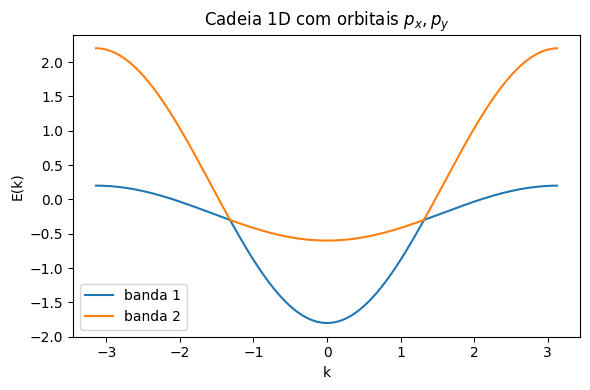

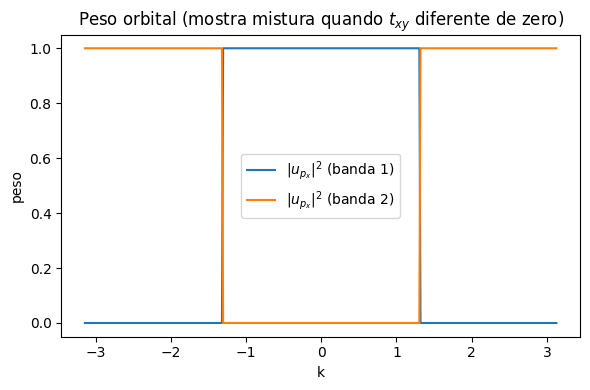

In [32]:
# Parâmetros
a = 1.0
epsx, epsy = 0.2, -0.2
tx, ty = -1.0, -0.2      # px (sigma) mais dispersivo, py (pi) menos dispersivo
txy = 0.0               # coloque 0.1 para ver mistura/anticruzamento

Nk = 400
k = np.linspace(-np.pi/a, np.pi/a, Nk, endpoint=False)

def Hk_px_py(k, epsx, epsy, tx, ty, txy=0.0, a=1.0):
    c = np.cos(k*a)
    H = np.array([[epsx + 2*tx*c,  2*txy*c],
                  [2*txy*c,        epsy + 2*ty*c]], dtype=float)
    return H

E = np.zeros((2, Nk))
Wpx = np.zeros((2, Nk))  # pesos de px para cada banda

for i, ki in enumerate(k):
    Hk = Hk_px_py(ki, epsx, epsy, tx, ty, txy=txy, a=a)
    evals, evecs = LA.eigh(Hk)
    E[:, i] = evals
    # peso de px na banda n: |(evecs[0,n])|^2
    Wpx[0, i] = np.abs(evecs[0, 0])**2
    Wpx[1, i] = np.abs(evecs[0, 1])**2

# Plot bandas
plt.figure(figsize=(6,4))
plt.plot(k, E[0], label="banda 1")
plt.plot(k, E[1], label="banda 2")
plt.xlabel("k"); plt.ylabel("E(k)")
plt.title(r"Cadeia 1D com orbitais $p_x,p_y$")
plt.legend(); plt.tight_layout(); plt.show()

# Plot peso orbital px em cada banda (útil se txy != 0)
plt.figure(figsize=(6,4))
plt.plot(k, Wpx[0], label=r"$|u_{p_x}|^2$ (banda 1)")
plt.plot(k, Wpx[1], label=r"$|u_{p_x}|^2$ (banda 2)")
plt.ylim(-0.05, 1.05)
plt.xlabel("k"); plt.ylabel("peso")
plt.title("Peso orbital (mostra mistura quando $t_{xy}$ diferente de zero)")
plt.legend(); plt.tight_layout(); plt.show()

## 7. Exemplo 4 (2D): rede quadrada e estrutura de bandas $E(\mathbf{k})$

Agora passamos para 2D de forma operacional, usando a **rede quadrada** como exemplo mínimo.
A ideia é a mesma do caso 1D: hoppings no espaço real geram fases $e^{i\mathbf{k}\cdot\mathbf{R}}$
e produzem uma dispersão $E(\mathbf{k})$.

### 7.1 Rede quadrada (real e recíproca)

Escolhemos vetores primitivos (rede real):
$$
\mathbf{a}_1 = a(1,0),\qquad \mathbf{a}_2 = a(0,1).
$$

A zona de Brillouin (1ª BZ) é um quadrado com
$$
k_x, k_y \in \left[-\frac{\pi}{a},\frac{\pi}{a}\right].
$$

Pontos de alta simetria (convenção padrão):
$$
\Gamma=(0,0),\quad X=\left(\frac{\pi}{a},0\right),\quad M=\left(\frac{\pi}{a},\frac{\pi}{a}\right).
$$

### 7.2 Modelo tight-binding mínimo (1 orbital por sítio)

Consideramos:
- energia onsite $\varepsilon$,
- hopping apenas para primeiros vizinhos (NN) com amplitude $t$.

Os vetores NN são $\pm a\hat{x}$ e $\pm a\hat{y}$.

Aplicando a receita TB:
$$
E(\mathbf{k}) = \varepsilon + \sum_{\text{NN}} t\, e^{i\mathbf{k}\cdot\mathbf{R}},
$$
obtemos explicitamente:
$$
\boxed{
E(k_x,k_y)=\varepsilon + 2t\cos(k_x a) + 2t\cos(k_y a).
}
$$

Esse é o análogo 2D do resultado 1D, e será nossa referência para entender bandas em redes 2D
antes de passar ao grafeno.

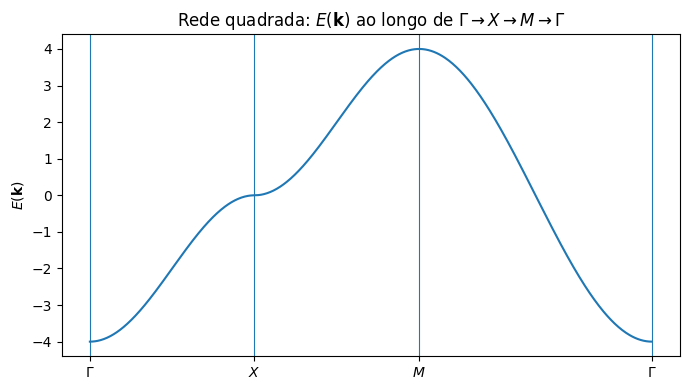

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo
a = 1.0
eps = 0.0
t = -1.0

def E_square(kx, ky, eps, t, a=1.0):
    return eps + 2*t*np.cos(kx*a) + 2*t*np.cos(ky*a)

# Pontos de alta simetria
G = np.array([0.0, 0.0])
X = np.array([np.pi/a, 0.0])
M = np.array([np.pi/a, np.pi/a])

def kpath(points, n_per_segment=200):
    """
    Constrói um caminho em k passando sequencialmente pelos pontos fornecidos.
    Retorna:
      k_list: array (N,2) com pontos k
      s: coordenada escalar acumulada ao longo do caminho (para o eixo x do plot)
      tick_positions: posições em s correspondentes aos pontos de alta simetria
    """
    k_list = []
    s_list = []
    tick_positions = [0.0]

    s_acc = 0.0
    for p0, p1 in zip(points[:-1], points[1:]):
        seg = np.linspace(0, 1, n_per_segment, endpoint=False)
        ks = (1-seg)[:,None]*p0 + seg[:,None]*p1
        # comprimentos incrementais
        dk = np.linalg.norm(p1 - p0)
        s_seg = s_acc + seg*dk
        k_list.append(ks)
        s_list.append(s_seg)

        s_acc += dk
        tick_positions.append(s_acc)

    # adiciona o último ponto
    k_list.append(points[-1][None, :])
    s_list.append(np.array([s_acc]))

    k_list = np.vstack(k_list)
    s = np.concatenate(s_list)
    return k_list, s, tick_positions

# Caminho Γ-X-M-Γ
points = [G, X, M, G]
k_list, s, ticks = kpath(points, n_per_segment=250)

# Calcula E(k) ao longo do caminho
E_path = E_square(k_list[:,0], k_list[:,1], eps, t, a=a)

# Plot
plt.figure(figsize=(7,4))
plt.plot(s, E_path)
plt.xticks(ticks, [r"$\Gamma$", r"$X$", r"$M$", r"$\Gamma$"])
for tp in ticks:
    plt.axvline(tp, linewidth=0.8)
plt.ylabel(r"$E(\mathbf{k})$")
plt.title("Rede quadrada: $E(\\mathbf{k})$ ao longo de $\\Gamma\\to X\\to M\\to \\Gamma$")
plt.tight_layout()
plt.show()

### Visualização: $E(k_x,k_y)$ como uma superfície

O resultado do tight-binding em 2D é uma função definida em todo o espaço recíproco
da 1ª zona de Brillouin: $E(k_x,k_y)$.

O gráfico ao longo de $\Gamma\to X\to M\to \Gamma$ é apenas um **corte 1D** dessa função,
tomado ao longo de um caminho de alta simetria no plano $(k_x,k_y)$.

Para ajudar a construir uma intuição geométrica, podemos visualizar $E(k_x,k_y)$ como uma
**superfície** sobre o plano $(k_x,k_y)$.

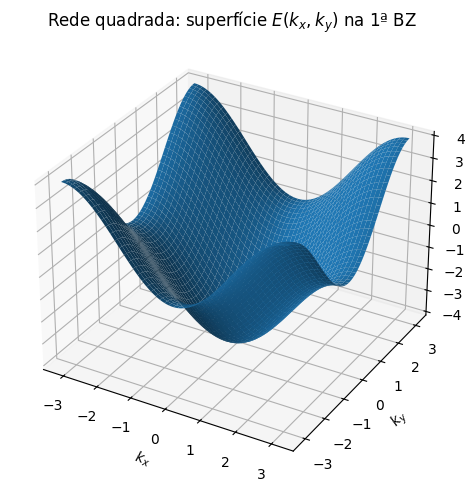

In [34]:
from mpl_toolkits.mplot3d import Axes3D  # necessário em alguns ambientes

Nk = 101
kx = np.linspace(-np.pi/a, np.pi/a, Nk)
ky = np.linspace(-np.pi/a, np.pi/a, Nk)
KX, KY = np.meshgrid(kx, ky, indexing="xy")
E2D = E_square(KX, KY, eps, t, a=a)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(KX, KY, E2D, rstride=2, cstride=2, linewidth=0, antialiased=True)

ax.set_xlabel(r"$k_x$")
ax.set_ylabel(r"$k_y$")
ax.set_zlabel(r"$E(k_x,k_y)$")
ax.set_title("Rede quadrada: superfície $E(k_x,k_y)$ na 1ª BZ")
plt.tight_layout()
plt.show()